# Manifold Learning [t-SNE, LLE, Isomap, +] Made Easy

https://towardsdatascience.com/manifold-learning-t-sne-lle-isomap-made-easy-42cfd61f5183

#### Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits  # mnist
X, _ = load_digits(return_X_y=True)  # load data

X


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### PCA

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale

scaled_data = scale(X.T)
# scaled_data = StandardScaler.fit_transform(X=X.T)

scaled_data


array([[-0.88626612, -0.75601439, -0.85336948, ..., -0.86716376,
        -0.86573282, -0.97282752],
       [-0.88626612, -0.75601439, -0.85336948, ..., -0.86716376,
        -0.86573282, -0.97282752],
       [ 0.07837728, -0.75601439, -0.85336948, ..., -0.7187721 ,
        -0.54359968,  0.61546231],
       ...,
       [-0.88626612,  0.78982973,  1.68689315, ...,  0.0231862 ,
         1.06706603,  0.93312027],
       [-0.88626612, -0.75601439,  0.57552825, ..., -0.86716376,
        -0.86573282, -0.81399853],
       [-0.88626612, -0.75601439, -0.85336948, ..., -0.86716376,
        -0.86573282, -0.97282752]])

In [3]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

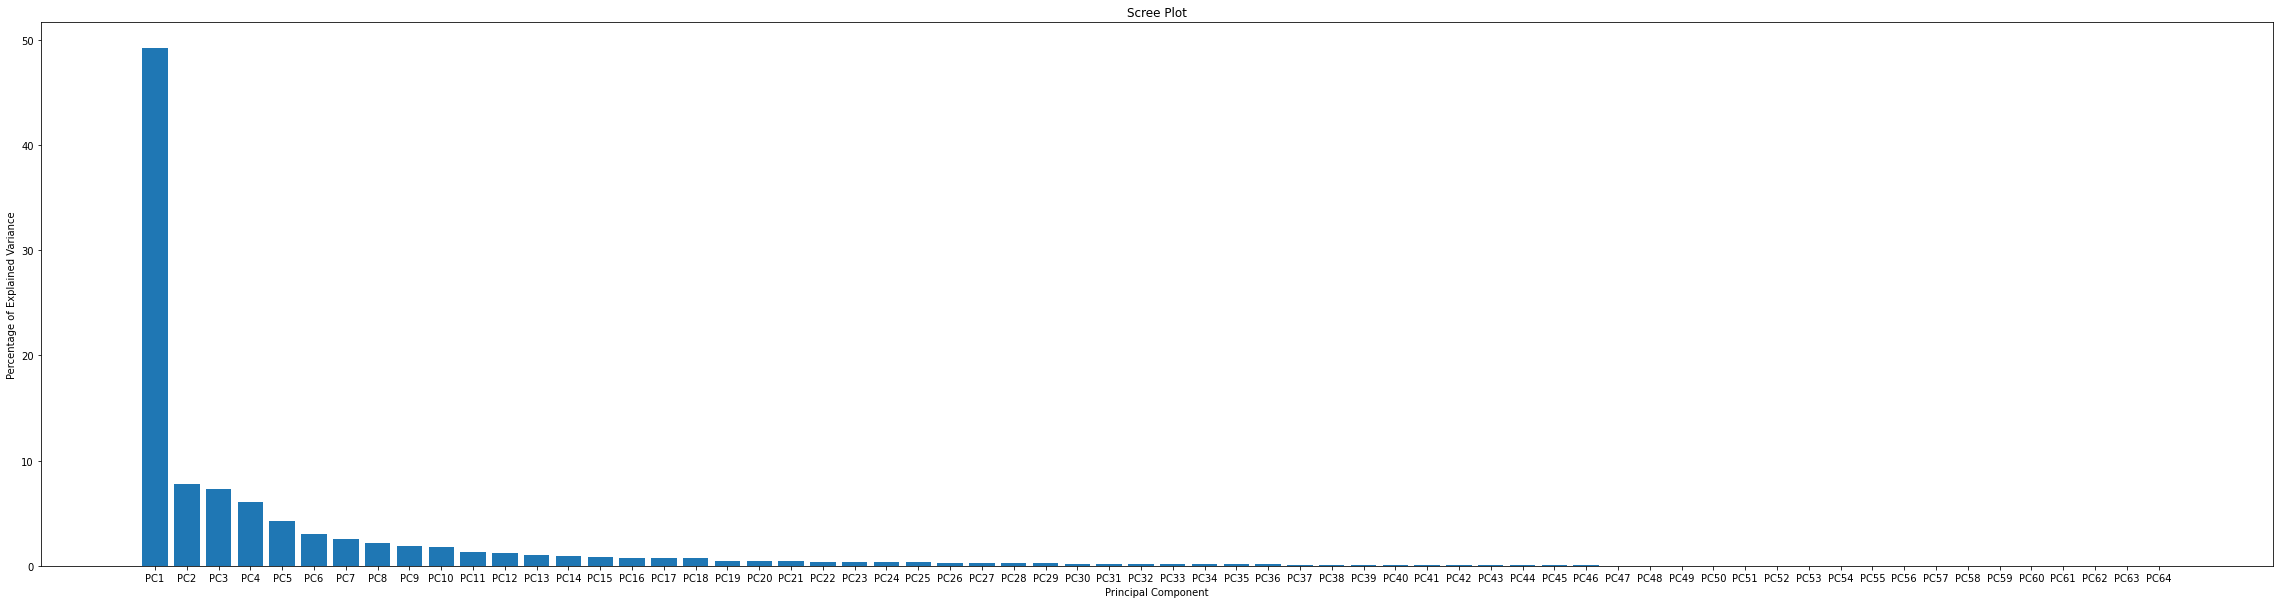

: 

In [15]:
pcs_percentage_variation = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
pcs_labels = ['PC' + str(i) for i in range(1, len(pcs_percentage_variation) + 1)]

plt.figure(figsize=(40, 10))
plt.bar(x=range(1, len(pcs_percentage_variation) + 1), height=pcs_percentage_variation, tick_label=pcs_labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


In [5]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=pcs_labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(pcs_percentage_variation[0]))
plt.ylabel('PC2 - {0}%'.format(pcs_percentage_variation[1]))


NameError: name 'wt' is not defined

### Ismap

In [5]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)          # resulting data has 2 dimensions, 'components'
X_transformed = embedding.fit_transform(X)  # fit model and transform

X_transformed

array([[ 167.62807583,   23.11320247],
       [ -47.9701441 ,   51.23937023],
       [-100.20186582,   25.91117683],
       ...,
       [ -51.29824016,  -23.37403466],
       [   0.22685295,  -72.97531198],
       [ -10.77128011,  -35.87036296]])

### LLE: Locally Linear Embedding

### t-SNE: t-Distributed Stochastic Neighbor Embedding